# Source of Data

![mainpage](mainpage.png)
{:.some-css-class height="200"}

![mainpage](detailspage.png)
{:.some-css-class height="200"}

In [82]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import plotly.offline as py
import plotly.graph_objs as go
import plotly.tools as tls
from IPython.display import Image, HTML
import re
from IPython.core.display import display, HTML, Javascript
from string import Template
import pandas as pd
import numpy as np
import json
import IPython.display
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import itertools
import seaborn as sns
sns.set_style("darkgrid")
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
 
%matplotlib inline
py.init_notebook_mode(connected=True)

# Content

* Every player featuring in FIFA 18
* 70+ attributes
* Player and Flag Images
* Playing Position Data
* Attributes based on actual data of the latest EA's FIFA 18 game
* Attributes include all player style statistics like Dribbling, Aggression, GK Skills etc.

# Data Cleaning and Manipulation

* The Wage and Value of all the players were strings with the symbol of the currency in front of the values - €190K . Thes were converted to numeric values. 

* The preferred positions of all the players was available as a space separated string ( ST LW ) which was converted to a list for easier retrieval.

* A new attribute FieldPosition was created by mapping the preferred positions of all the players with their respective roles in the team, like attack, midfielder, defence or goalkeeper.

* Using the nationality of the players, a new attribute was created that contained the continent the player belonged to.

In [83]:
data = pd.read_csv('CompleteDataset.csv', encoding='utf-8')
data = data.drop(data.columns[0], axis = 1)
def in_preferred_position(list_pos, pos):
    if pos in list_pos:
        return True
    return False
# Converting preferred positions to a list
data['Preferred Positions'] = list(map(lambda x: x.split(), data['Preferred Positions']))
# Supporting function for converting string values into numbers
def str2number(amount):
    if amount[-1] == 'M':
        return float(amount[1:-1])*1000000
    elif amount[-1] == 'K':
        return float(amount[1:-1])*1000
    else:
        return float(amount[1:])

data['Value'] = data['Value'].apply(lambda x: str2number(x))
data['Wage'] = data['Wage'].apply(lambda x: str2number(x)) 
data.apply(pd.to_numeric, errors='coerce')
def convert_to_float(x):
    if len(x.split('+')) > 1:
        return float(x.split('+')[0])
    if len(x.split('-')) > 1:
        return float(x.split('-')[0])
    else:
        return float(x)

a = [ 'Acceleration', 'Aggression', 'Agility', 'Balance', 'Ball control',
       'Composure', 'Crossing', 'Curve', 'Dribbling', 'Finishing',
       'Free kick accuracy', 'GK diving', 'GK handling', 'GK kicking',
       'GK positioning', 'GK reflexes', 'Heading accuracy', 'Interceptions',
       'Jumping', 'Long passing', 'Long shots', 'Marking', 'Penalties',
       'Positioning', 'Reactions', 'Short passing', 'Shot power',
       'Sliding tackle', 'Sprint speed', 'Stamina', 'Standing tackle',
       'Strength', 'Vision', 'Volleys']

for p in a:
    data[p] = list(map(convert_to_float, data[p]))                 

In [84]:
mapping = {'ST': 'Attack', 'RW': 'Attack', 'LW': 'Attack', 'RM': 'Midfield', 'CM': 'Midfield', 'LM': 'Midfield', 'CAM': 'Midfield', 'CF': 'Midfield', 'CDM': 'Midfield', 'CB': 'Defence', 'LB': 'Defence', 'RB': 'Defence', 'RWB': 'Defence', 'LWB': 'Defence', 'GK': 'Goalkeeper'}

# for position in mapping.keys(): 
#     data[[in_preferred_position(x, position) for x in data['Preferred Positions']]]
    
for index, row in data.iterrows():
    data.loc[index, 'FieldPosition'] = mapping[row['Preferred Positions'][0]]

In [85]:
continents = {
    'Africa' : ['Algeria','Angola','Benin','Botswana','Burkina','Burundi','Cameroon','Cape Verde','Central African Republic','Chad','Comoros','Congo','DR Congo','Djibouti','Egypt','Equatorial Guinea','Eritrea','Ethiopia','Gabon','Gambia','Ghana','Guinea','Guinea Bissau','Ivory Coast','Kenya','Lesotho','Liberia','Libya','Madagascar','Malawi','Mali','Mauritania','Mauritius','Morocco','Mozambique','Namibia','Niger','Nigeria','Rwanda','Sao Tome and Principe','Senegal','Seychelles','Sierra Leone','Somalia','South Africa','South Sudan','Sudan','Swaziland','Tanzania','Togo','Tunisia','Uganda','Zambia','Zimbabwe','Burkina Faso'],
    'Antarctica' : ['Fiji','Kiribati','Marshall Islands','Micronesia','Nauru','Palau','Papua New Guinea','Samoa','Solomon Islands','Tonga','Tuvalu','Vanuatu'],
    'Asia' : ['Afghanistan','Bahrain','Bangladesh','Bhutan','Brunei','Burma (Myanmar)','Cambodia','China','China PR','East Timor','India','Indonesia','Iran','Iraq','Israel','Japan','Jordan','Kazakhstan','North Korea','South Korea','Korea Republic','Korea DPR','Kuwait','Kyrgyzstan','Laos','Lebanon','Malaysia','Maldives','Mongolia','Nepal','Oman','Pakistan','Palestine','Philippines','Qatar','Russian Federation','Saudi Arabia','Singapore','Sri Lanka','Syria','Tajikistan','Thailand','Turkey','Turkmenistan','United Arab Emirates','Uzbekistan','Vietnam','Yemen','Russia'],
    'Australia Oceania' : ['Australia','New Caledonia', 'New Zealand'],
    'Europe' : ['Albania','Andorra','Armenia','Austria','Azerbaijan','Belarus','Belgium','Bosnia Herzegovina','Bulgaria','Croatia','Cyprus','Czech Republic','Denmark','Estonia','Finland','France','FYR Macedonia','Georgia','Germany','Greece','Hungary','Iceland','Ireland','Italy','Kosovo','Latvia','Liechtenstein','Lithuania','Luxembourg','Macedonia','Malta','Moldova','Monaco','Montenegro','Netherlands','Northern Ireland','Norway','Poland','Portugal','Romania','San Marino','Scotland','Serbia','Slovakia','Slovenia','Spain','Sweden','Switzerland','Ukraine','England','Vatican City','Republic of Ireland','Wales'],
    'North America' : ['Antigua and Barbuda','Bahamas','Barbados','Belize','Canada','Costa Rica','Cuba','Dominica','Dominican Republic','El Salvador','Grenada','Guatemala','Haiti','Honduras','Jamaica','Mexico','Nicaragua','Panama','Saint Kitts and Nevis','Saint Lucia','Saint Vincent and the Grenadines','Trinidad and Tobago','United States'],
    'South America' : ['Argentina','Bolivia','Brazil','Chile','Colombia','Curacao','Ecuador','Guyana','Paraguay','Peru','Suriname','Trinidad & Tobago','Uruguay','Venezuela']
}

In [86]:
#Creating a function that assigns continent to each country
def find_continent(x, continents_list):
    # Iteration over 
    for key in continents_list:
        if x in continents_list[key]:
            return key
    return np.NaN

data['Continent'] = data['Nationality'].apply(lambda x: find_continent(x, continents))

In [87]:
data.head()

ID                                           Photo               Name  \
0  158023  https://cdn.sofifa.org/players/4/18/158023.png           L. Messi   
1   20801   https://cdn.sofifa.org/players/4/18/20801.png  Cristiano Ronaldo   
2  190871  https://cdn.sofifa.org/players/4/18/190871.png             Neymar   
3  176580  https://cdn.sofifa.org/players/4/18/176580.png          L. Suárez   
4  167495  https://cdn.sofifa.org/players/4/18/167495.png           M. Neuer   

   Age Nationality                                 Flag  Overall  Potential  \
0   30   Argentina  https://cdn.sofifa.org/flags/52.png       93         93   
1   32    Portugal  https://cdn.sofifa.org/flags/38.png       94         94   
2   25      Brazil  https://cdn.sofifa.org/flags/54.png       92         94   
3   30     Uruguay  https://cdn.sofifa.org/flags/60.png       92         92   
4   31     Germany  https://cdn.sofifa.org/flags/21.png       92         92   

                  Club                                   Club Logo  \
0         FC Barcelona  https://cdn.sofifa.org/24/18/teams/241.png   
1       Real Madrid CF  https://cdn.sofifa.org/24/18/teams/243.png   
2  Paris Saint-Germain   https://cdn.sofifa.org/24/18/teams/73.png   
3         FC Barcelona  https://cdn.sofifa.org/24/18/teams/241.png   
4     FC Bayern Munich   https://cdn.sofifa.org/24/18/teams/21.png   

       ...         RCM   RDM    RF    RM    RS    RW   RWB    ST  \
0      ...        84.0  59.0  92.0  90.0  88.0  91.0  62.0  88.0   
1      ...        82.0  62.0  91.0  89.0  92.0  91.0  66.0  92.0   
2      ...        79.0  59.0  88.0  87.0  84.0  89.0  64.0  84.0   
3      ...        80.0  65.0  88.0  85.0  88.0  87.0  68.0  88.0   
4      ...         NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   

   FieldPosition      Continent  
0         Attack  South America  
1         Attack         Europe  
2         Attack  South America  
3         Attack  South America  
4     Goalkeeper         Europe  

[5 rows x 76 columns]

In [88]:
top_1000 = data.sort_values("Overall", ascending=False).reset_index().head(2000)[["Name", "Nationality", "Continent", "Overall", "Club"]]

In [89]:
data_f = {}
data_f["name"] = "DISTRIBUTION OF TOP 1000 PLAYERS ACCORDING TO NATIONALITY"
data_f["children"] = []

# Split dataset into Continents:
for continent in top_1000['Continent'].unique():
    
    continent_set = top_1000[top_1000["Continent"]==continent]
    continent_dict = {}
    continent_dict["name"] = continent
    continent_dict["children"] = []
    
    for country in continent_set['Nationality'].unique():
        
        countries_set = continent_set[continent_set['Nationality']==country][['Name', 'Overall']]
        
        country_dict = {}
        country_dict["name"] = country
        country_dict["children"] = []
        
        for player in countries_set.values:
            
            player_dict = {}
            player_dict['name'] = player[0]
            player_dict['size'] = player[1]/20
            country_dict["children"].append(player_dict)
            
        continent_dict['children'].append(country_dict)
        
    data_f["children"].append(continent_dict)

In [90]:
html_string = """
<!DOCTYPE html>
<meta charset="utf-8">
<style>
.node {
  cursor: pointer;
}
.node:hover {
  stroke: #000;
  stroke-width: 1.5px;
}
.node--leaf {
  fill: white;
}
.label {
  font: 10px "Helvetica Neue", Helvetica, Arial, sans-serif;
  text-anchor: middle;
  text-shadow: 0 1px 0 #fff, 1px 0 0 #fff, -1px 0 0 #fff, 0 -1px 0 #fff;
}
.label,
.node--root,
.node--leaf {
  pointer-events: none;
}
</style>
<svg width="900" height="900"></svg>
"""



In [91]:
js_string="""
require.config({
    paths: {
        d3: "https://d3js.org/d3.v4.min"
     }
});

require(["d3"], function(d3) {

   console.log(d3);

var svg = d3.select("svg"),
    margin = 20,
    diameter = +svg.attr("width"),
    g = svg.append("g").attr("transform", "translate(" + diameter / 2 + "," + diameter / 2 + ")");

var color = d3.scaleSequential(d3.interpolateViridis)
    .domain([-4, 4]);
var pack = d3.pack()
    .size([diameter - margin, diameter - margin])
    .padding(2);
d3.json("output.json", function(error, root) {
  if (error) throw error;

root = d3.hierarchy(root)
      .sum(function(d) { return d.size; })
      .sort(function(a, b) { return b.value - a.value; });

var focus = root,
      nodes = pack(root).descendants(),
      view;

var circle = g.selectAll("circle")
        .data(nodes)
        .enter().append("circle")
        .attr("class", function(d) { return d.parent ? d.children ? "node" : "node node--leaf" : "node node--root"; })
        .style("fill", function(d) { return d.children ? color(d.depth) : null; })
        .on("click", function(d) { if (focus !== d) zoom(d), d3.event.stopPropagation(); });

  var text = g.selectAll("text")
      .data(nodes)
      .enter().append("text")
      .attr("class", "label")
      .style("fill-opacity", function(d) { return d.parent === root ? 1 : 0; })
      .style("display", function(d) { return d.parent === root ? "inline" : "none"; })
      .text(function(d) { return d.data.name; });
   
   var node = g.selectAll("circle,text");
   
   svg
      .style("background", color(-1))
      .on("click", function() { zoom(root); });
      
   zoomTo([root.x, root.y, root.r * 2 + margin]);
   
   function zoom(d) {
    var focus0 = focus; focus = d;

    var transition = d3.transition()
        .duration(d3.event.altKey ? 7500 : 750)
        .tween("zoom", function(d) {
          var i = d3.interpolateZoom(view, [focus.x, focus.y, focus.r * 2 + margin]);
          return function(t) { zoomTo(i(t)); };
        });

   transition.selectAll("text")
      .filter(function(d) { return d.parent === focus || this.style.display === "inline"; })
        .style("fill-opacity", function(d) { return d.parent === focus ? 1 : 0; })
        .on("start", function(d) { if (d.parent === focus) this.style.display = "inline"; })
        .on("end", function(d) { if (d.parent !== focus) this.style.display = "none"; });
  }
   function zoomTo(v) {
    var k = diameter / v[2]; view = v;
    node.attr("transform", function(d) { return "translate(" + (d.x - v[0]) * k + "," + (d.y - v[1]) * k + ")"; });
    circle.attr("r", function(d) { return d.r * k; });
  }
});
 });
"""


In [92]:
with open('output.json', 'w') as outfile:  
    json.dump(data_f, outfile)




# Geographic distribution of players

In [93]:
h = display(HTML(html_string))
j = IPython.display.Javascript(js_string)
IPython.display.display_javascript(j)

In [94]:
reordered_cols = []
personal_cols = []
personal_cols = ['ID', 'Name', 'Photo', 'Club', 'Club Logo', 'Preferred Positions', 'Flag', 'Nationality', 'Wage', 'Value']
reordered_cols = personal_cols + [col for col in data if (col not in personal_cols)]
data = data[reordered_cols]
country_data = data.iloc[:, 6:]
country_data.iloc[:, 2:] = country_data.iloc[:, 2:].apply(pd.to_numeric, errors='coerce')

In [95]:
agg_dict = {}
agg_dict = {'Flag': ['min']}
for col in country_data.columns[2:]:
    agg_dict[col] = ['mean', 'max', 'min', 'size']
group_by_country = country_data.groupby(['Nationality'])
country_stats = group_by_country.agg(agg_dict)
country_stats[('Flag', 'min')] = '<img src="' + country_stats[('Flag', 'min')] + '">'


# Summary statistics of Nationalities

In [96]:
HTML(country_stats.head(10).to_html(escape=False))

In [97]:
def create_trace(feature, basic_stat, is_visible):
    trace = go.Choropleth(
        locations= country_stats.index,
        locationmode= 'country names',
        z= country_stats[(feature, basic_stat)],
        text= country_stats[(feature, 'size')],
        visible = is_visible,
        colorscale = [
            [0.0,"rgb(25, 100, 255)"],[0.2,"rgb(25, 175, 255)"],[0.4,"rgb(25, 255, 255)"],
            [0.6,"rgb(25, 255, 175)"],[0.8,"rgb(25, 255, 100)"],[1.0,"rgb(25, 255, 25)"]
            ],
        autocolorscale = False,
        reversescale = True,
        marker = dict(
            line = dict (
                color = 'rgb(180,180,180)',
                width = 0.5
            ) ),
        colorbar = dict(
            #autotick = True,
            tickprefix = '',
            outlinecolor = "rgba(68, 68, 68, 0)",
            #dtick = 2,
            title = feature + '<br>' + basic_stat)
    )
    return trace

In [98]:
trace_data = []
buttons= []
is_visible = True
features = country_data.columns[2:]
stats = ['mean', 'max', 'min']
n = len(features) * len(stats)
nth_feature = 0
nth_stat = 0

for stat in stats:
    for feature in features:
        trace_data.append(create_trace(feature, stat, is_visible))
        is_visible = False
        
        pre_false = [False]*nth_feature
        post_false = [False]*(n-nth_feature-1)
        button = dict(
            label= feature + ' - ' + stat,
            method= 'update',
            args=[
                {'visible': pre_false + [True] + post_false},
                {'title': 'FIFA 2018 Statistics (' + feature + ' - ' + stat + ')'}
            ]
        )
        buttons.append(button)
        nth_feature += 1
        
updatemenus = list([
    dict(
        #type="buttons",
        direction='down',
        active=-1,
        xanchor='left',
        x=0,
        yanchor = 'top',
        y=1.065,
        showactive = True,
        buttons=buttons
    )
])

annotations = list([
    dict(text='(Feature - Stat):',
         x=0,
         y=1.12, 
         yref='paper',
         align='left',
         showarrow=False)
])

layout = dict(
    title = 'Nation wise statistics (' + features[0] + ' - ' + stats[0] + ')' ,
    geo = dict(
        showframe = False,
        showcoastlines = False,
        projection = dict(
            type = 'Mercator'
        )
    ),
    showlegend=False,
    updatemenus=updatemenus,
    annotations=annotations
)



# Summary Statistics on the World Map

In [99]:
fig = dict( data=trace_data, layout=layout )
py.iplot( fig, validate=False, filename='fifa-2018-world-map' )

# Takeaways
* South American, African and European players are generally rated higher than their counterparts from Asia, Australia or North America. While the nationwide average rating for USA stands at 65.81 and 58.06 for India it is about 71.24 for Brazil and 69.11 for China.
* Brazil, Russia, Syria and Croatia are some of the countries from where the players are paid the highest.

# Overall vs Age by Field Position

In [100]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="white")

# Load the example mpg dataset
mpg = data

# Plot miles per gallon against horsepower with other semantics

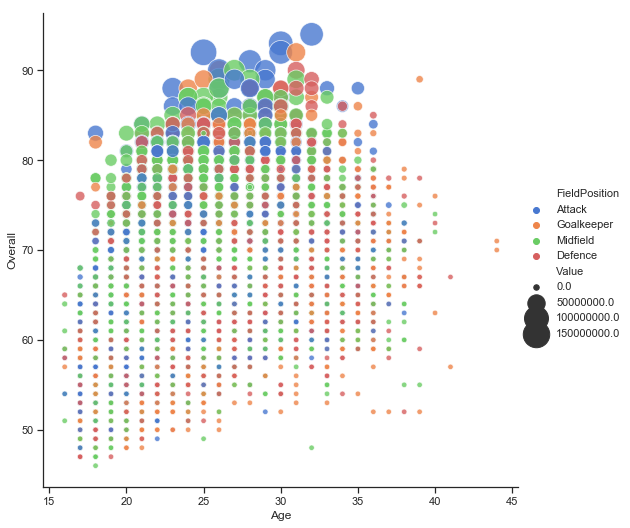

In [153]:
p = sns.relplot(x="Age", y="Overall", hue="FieldPosition", size="Value",sizes=(30, 700), alpha=0.8, palette="muted",height=7.5, data=mpg)

# Overall Rating of Top 10 Countries 

In [154]:
def overallbox():
    df = data.copy()
    sns.set(style="ticks", palette="pastel")
    a4_dims = (11.7, 8.27)
    fig, ax = plt.subplots(figsize=a4_dims)


    top10 = list(df['Nationality'].value_counts().head(10).index)
    d = df.query('Nationality in @top10')
    box_overall = sns.boxplot(data = d, y = 'Overall', x = 'Nationality')
    sns.despine(offset=10, trim=True)



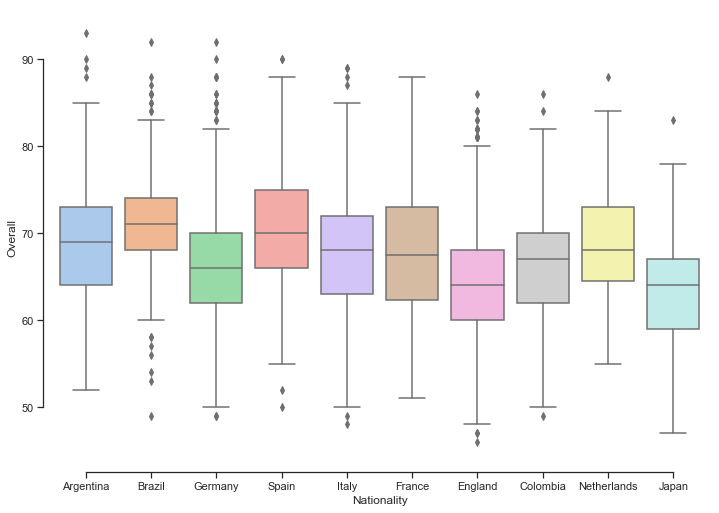

In [155]:
overallbox()

# Potential of Top 10 Countries


In [104]:
def potential_box():
    sns.set(style="ticks", palette="pastel")
    a4_dims = (11.7, 8.27)
    fig, ax = plt.subplots(figsize=a4_dims)

    box_potential = sns.boxplot(data = d, y = 'Potential', x = 'Nationality')
    sns.despine(offset=10, trim=True)

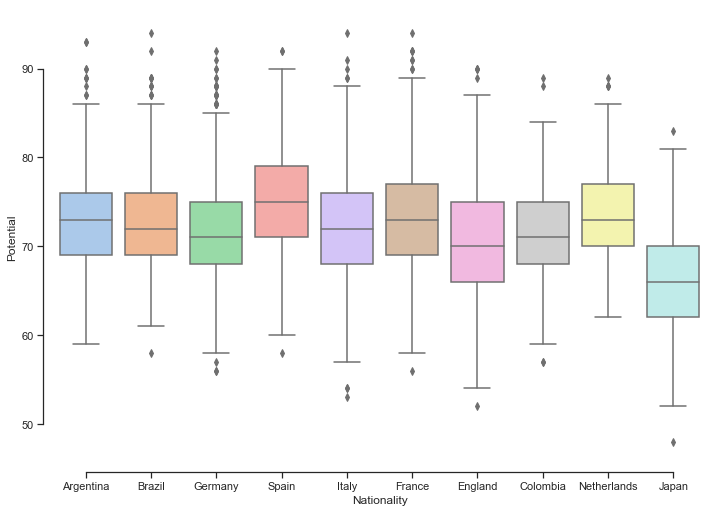

In [105]:
potential_box()

In [106]:
df_top10clubs = data[["Name", "Overall", "Club"]]
topclubs = df_top10clubs.groupby("Club", as_index= False).median().sort_values("Overall", ascending = False).head(10)
topclubs = list(topclubs["Club"])

# Top 10 Clubs by Overall

In [107]:
df_top10clubs.groupby("Club", as_index= False).median().sort_values("Overall", ascending = False).head(10)

Club  Overall
465       Real Madrid CF     83.0
329             Juventus     83.0
221     FC Bayern Munich     82.5
218         FC Barcelona     82.0
375      Manchester City     81.5
431  Paris Saint-Germain     81.0
141              Chelsea     80.5
67       Atlético Madrid     80.0
376    Manchester United     79.5
51               Arsenal     79.5

# Overall of Top Clubs

In [108]:
def club_overall():
    clubs = topclubs
    c = data.query('Club in @clubs')

    sns.set(style="ticks", palette="pastel")
    a4_dims = (11.7, 8.27)
    fig, ax = plt.subplots(figsize=a4_dims)

    box_wage = sns.boxplot(data = c, y = 'Overall', x = 'Club')
    sns.despine(offset=10, trim=True)
    a = plt.setp(ax.get_xticklabels(), rotation=45)

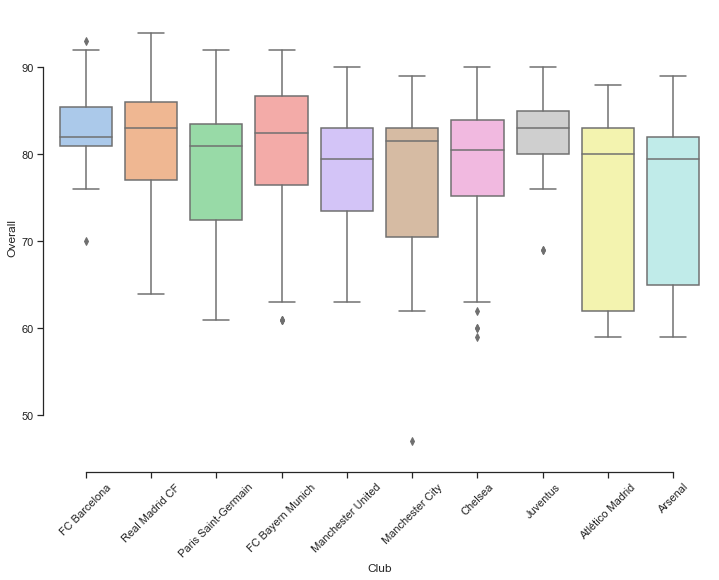

In [109]:
club_overall()

# Potential of Top 10 Clubs

In [156]:
def club_potential():
    c = data.query('Club in @clubs')

    sns.set(style="ticks", palette="pastel")
    a4_dims = (11.7, 8.27)
    fig, ax = plt.subplots(figsize=a4_dims)

    box_wage = sns.boxplot(data = c, y = 'Potential', x = 'Club')
    sns.despine(offset=10, trim=True)
    a = plt.setp(ax.get_xticklabels(), rotation=45)

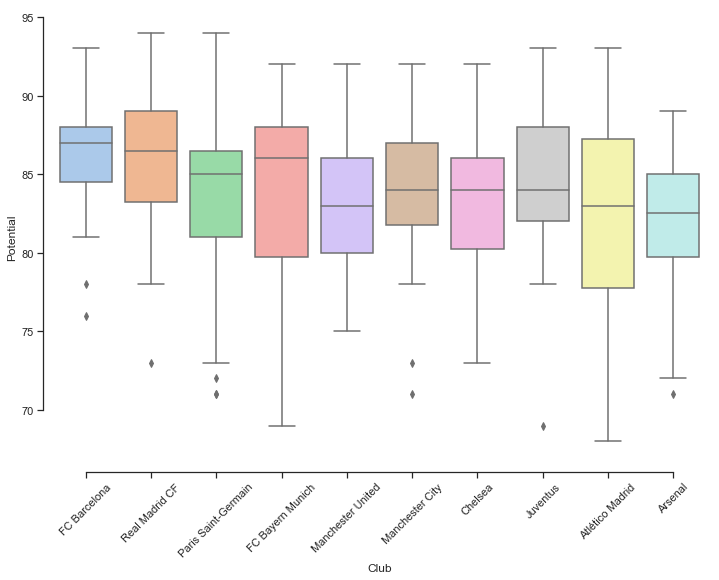

In [157]:
club_potential()

# Wage of Top Clubs

In [115]:
def clubwage():
    c = data.query('Club in @clubs')

    sns.set(style="ticks", palette="pastel")
    a4_dims = (12, 10)
    fig, ax = plt.subplots(figsize=a4_dims)

    box_wage = sns.boxplot(data = c, y = 'Wage', x = 'Club')
    sns.despine(offset=10, trim=True)
    a = plt.setp(ax.get_xticklabels(), rotation=45)

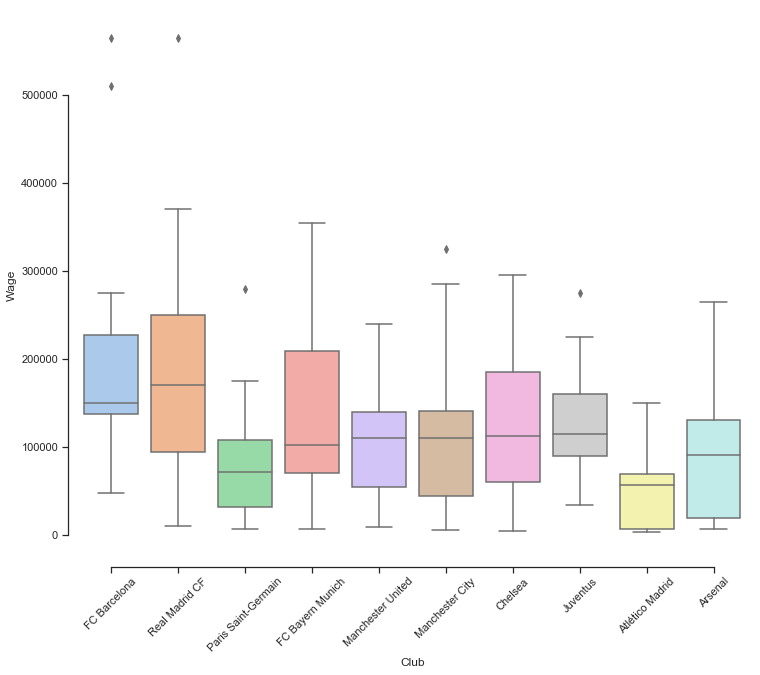

In [116]:
clubwage()

# Value of Top Clubs

In [117]:
def valueclub():
    sns.set(style="ticks", palette="pastel")
    a4_dims = (12, 10)
    fig, ax = plt.subplots(figsize=a4_dims)
    meds = c.median().sort_values()

    box_wage = sns.boxplot(data = c, y = 'Value', x = 'Club')
    sns.despine(offset=10, trim=True)

    a = plt.setp(ax.get_xticklabels(), rotation=45)

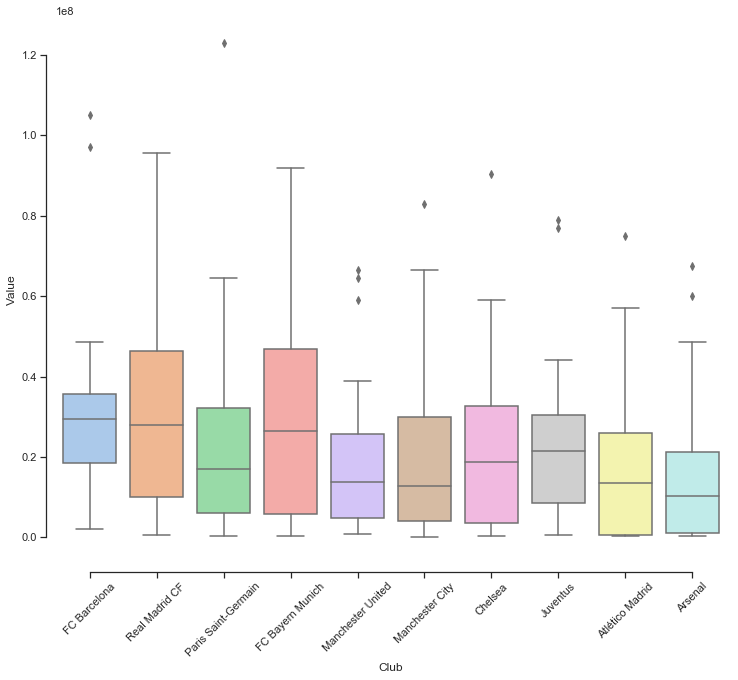

In [118]:
valueclub()

# Overall/Potential vs Age

In [119]:
def overall_potential():
    overall = pd.DataFrame(df.groupby(["Age"])['Overall'].mean())
    potential = pd.DataFrame(df.groupby(["Age"])['Potential'].mean())
    merged = pd.merge(overall, potential, on='Age', how='inner')
    merged['Age']= merged.index
    fig, ax = plt.subplots(figsize=(11, 8))
    merged.reset_index(drop = True, inplace = True)
    p = plt.plot('Age', 'Overall', data=merged, marker='.', color='skyblue', linewidth=1, label ="Overall" )
    p = plt.plot('Age', 'Potential', data=merged, marker='.', color='green', linewidth=1, label = "Potential")
    p = plt.legend()

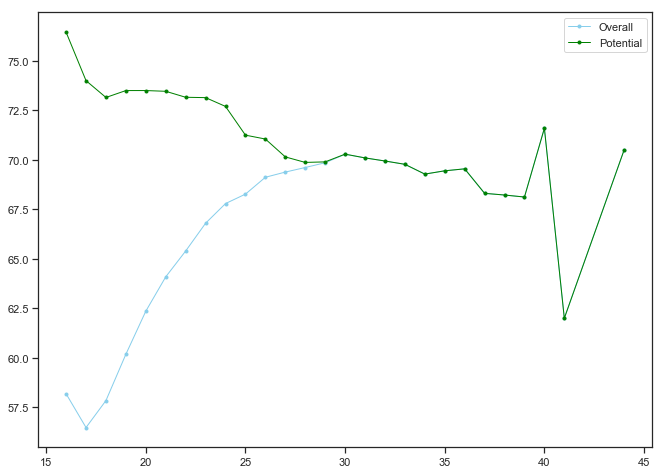

In [120]:
overall_potential()

# Correlation matrix of all numeric attributes

In [187]:
#Selects list of non-gola keeper attribute ratings and creates a correlation matrix(as a heatmap) with respect to Overall Rating
def correlation():
    L = [11]+list(range(13,25))+list(range(30,48))
    df = data.iloc[ :, L]
    fig, ax = plt.subplots()
    fig.set_size_inches(13,11)
    ax = sns.heatmap(df.corr(),cmap = "Blues").set_title('Correlation matrix')

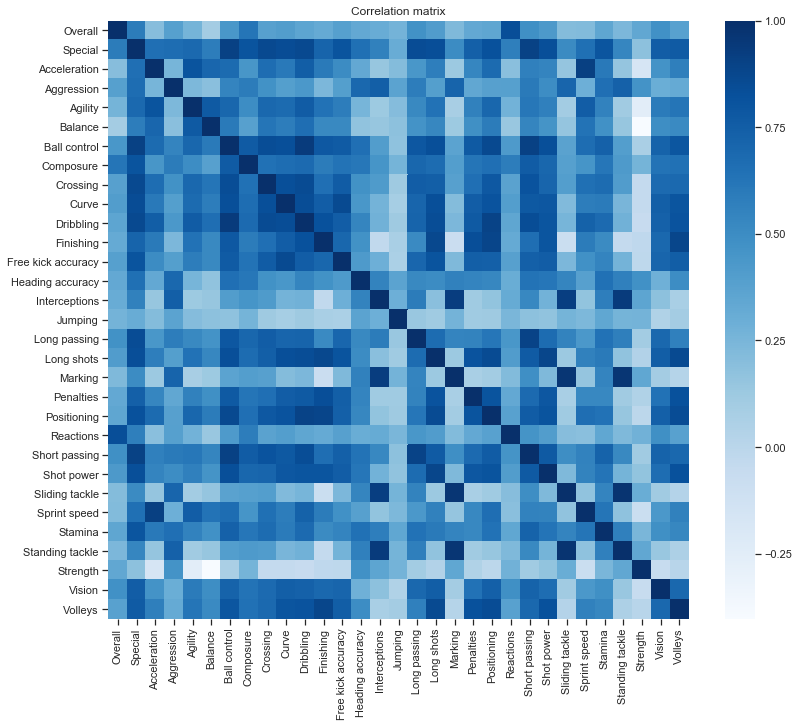

In [188]:
correlation()

##  Attributes highly correlated with Overall Rating

In [163]:
df_overall = df.corr()
df_overall[df_overall['Overall']>=0.5]

ID      Wage     Value       Age   Overall  Potential  \
Wage      -0.219937  1.000000  0.852816  0.152350  0.610600   0.526980   
Value     -0.140231  0.852816  1.000000  0.077460  0.644104   0.600946   
Overall   -0.406280  0.610600  0.644104  0.443147  1.000000   0.685952   
Potential  0.020098  0.526980  0.600946 -0.236927  0.685952   1.000000   
Special   -0.212998  0.373438  0.380857  0.220814  0.594735   0.396257   
Composure -0.307655  0.399511  0.408775  0.306380  0.624680   0.401649   
Reactions -0.394083  0.515644  0.545232  0.446227  0.840747   0.523800   
CAM       -0.248291  0.420412  0.463791  0.222771  0.644681   0.472888   
CDM       -0.324094  0.322545  0.310440  0.366773  0.592839   0.334718   
CF        -0.236348  0.415922  0.458845  0.214188  0.631235   0.461371   
CM        -0.344363  0.466408  0.497489  0.342407  0.758624   0.508838   
LAM       -0.248291  0.420412  0.463791  0.222771  0.644681   0.472888   
LB        -0.260556  0.299102  0.283907  0.306188  0.546128   0.318729   
LCM       -0.344363  0.466408  0.497489  0.342407  0.758624   0.508838   
LDM       -0.324094  0.322545  0.310440  0.366773  0.592839   0.334718   
LF        -0.236348  0.415922  0.458845  0.214188  0.631235   0.461371   
LM        -0.229552  0.419252  0.461110  0.210154  0.648888   0.474871   
LS        -0.275424  0.429943  0.465976  0.268431  0.660398   0.449750   
LW        -0.209340  0.397395  0.440039  0.183844  0.602767   0.449192   
LWB       -0.281473  0.345142  0.339141  0.320069  0.615126   0.372918   
RAM       -0.248291  0.420412  0.463791  0.222771  0.644681   0.472888   
RB        -0.260556  0.299102  0.283907  0.306188  0.546128   0.318729   
RCM       -0.344363  0.466408  0.497489  0.342407  0.758624   0.508838   
RDM       -0.324094  0.322545  0.310440  0.366773  0.592839   0.334718   
RF        -0.236348  0.415922  0.458845  0.214188  0.631235   0.461371   
RM        -0.229552  0.419252  0.461110  0.210154  0.648888   0.474871   
RS        -0.275424  0.429943  0.465976  0.268431  0.660398   0.449750   
RW        -0.209340  0.397395  0.440039  0.183844  0.602767   0.449192   
RWB       -0.281473  0.345142  0.339141  0.320069  0.615126   0.372918   
ST        -0.275424  0.429943  0.465976  0.268431  0.660398   0.449750   

            Special  Acceleration  Aggression   Agility    ...           RB  \
Wage       0.373438      0.151063    0.208595  0.176476    ...     0.299102   
Value      0.380857      0.179586    0.187168  0.203534    ...     0.283907   
Overall    0.594735      0.204846    0.390804  0.261315    ...     0.546128   
Potential  0.396257      0.245621    0.183139  0.232169    ...     0.318729   
Special    1.000000      0.655904    0.669152  0.691936    ...     0.609859   
Composure  0.806112      0.446907    0.590428  0.498300    ...     0.405179   
Reactions  0.578211      0.191520    0.387955  0.273506    ...     0.511510   
CAM        0.853668      0.490493    0.044486  0.647069    ...     0.188341   
CDM        0.636551     -0.139218    0.706184 -0.046006    ...     0.967559   
CF         0.822456      0.514741    0.013082  0.633047    ...     0.107468   
CM         0.942777      0.278930    0.319880  0.467864    ...     0.547276   
LAM        0.853668      0.490493    0.044486  0.647069    ...     0.188341   
LB         0.609859     -0.005846    0.649905  0.013173    ...     1.000000   
LCM        0.942777      0.278930    0.319880  0.467864    ...     0.547276   
LDM        0.636551     -0.139218    0.706184 -0.046006    ...     0.967559   
LF         0.822456      0.514741    0.013082  0.633047    ...     0.107468   
LM         0.870706      0.571038    0.059694  0.676873    ...     0.256112   
LS         0.793473      0.433888    0.061352  0.529116    ...     0.062168   
LW         0.824335      0.589816   -0.014457  0.700777    ...     0.140760   
LWB        0.725528      0.099498    0.607834  0.147070    ...     0.980732   
RAM        0.853668      0.490493    0.044486  0.647069    ... 

## Attributes moderately correlated with Overall Rating

In [164]:
df_overall[(df_overall['Overall'] >= 0.4) & (df_overall['Overall'] < 0.5)]

ID      Wage     Value       Age   Overall  Potential  \
Age           -0.715897  0.152350  0.077460  1.000000  0.443147  -0.236927   
Ball control  -0.088271  0.298494  0.313495  0.067130  0.444657   0.359052   
Curve         -0.143644  0.274350  0.290785  0.126213  0.408197   0.287113   
Long passing  -0.174401  0.296624  0.304222  0.168382  0.469742   0.330673   
Long shots    -0.143254  0.272486  0.286909  0.137745  0.411208   0.277009   
Short passing -0.121064  0.314929  0.329403  0.114470  0.483426   0.371725   
Shot power    -0.145897  0.277277  0.285427  0.138002  0.426181   0.292681   
Vision        -0.188636  0.326470  0.353287  0.171499  0.479219   0.346518   
CB            -0.268469  0.217535  0.185084  0.325553  0.431807   0.205840   
LCB           -0.268469  0.217535  0.185084  0.325553  0.431807   0.205840   
RCB           -0.268469  0.217535  0.185084  0.325553  0.431807   0.205840   

                Special  Acceleration  Aggression   Agility    ...     \
Age            0.220814     -0.154101    0.255599 -0.025884    ...      
Ball control   0.907658      0.677129    0.545912  0.702668    ...      
Curve          0.847928      0.610713    0.394033  0.680401    ...      
Long passing   0.848010      0.443616    0.585539  0.519954    ...      
Long shots     0.836585      0.579753    0.394291  0.642037    ...      
Short passing  0.904984      0.568492    0.601941  0.614016    ...      
Shot power     0.834539      0.546668    0.501354  0.571481    ...      
Vision         0.756412      0.464757    0.299644  0.595115    ...      
CB             0.382923     -0.294893    0.743894 -0.280183    ...      
LCB            0.382923     -0.294893    0.743894 -0.280183    ...      
RCB            0.382923     -0.294893    0.743894 -0.280183    ...      

                     RB       RCB       RCM       RDM        RF        RM  \
Age            0.306188  0.325553  0.342407  0.366773  0.214188  0.210154   
Ball control   0.262769  0.016287  0.872830  0.319005  0.902153  0.911107   
Curve          0.161092 -0.084295  0.720566  0.188891  0.782575  0.793184   
Long passing   0.588231  0.421287  0.846979  0.688845  0.539674  0.635073   
Long shots     0.020395 -0.172261  0.711189  0.087539  0.853059  0.780402   
Short passing  0.496809  0.296132  0.916871  0.591267  0.725205  0.783744   
Shot power     0.079822 -0.053108  0.645489  0.152830  0.762203  0.678566   
Vision         0.175282 -0.055538  0.844585  0.261263  0.841440  0.842597   
CB             0.924760  1.000000  0.311972  0.928626 -0.160470 -0.051800   
LCB            0.924760  1.000000  0.311972  0.928626 -0.160470 -0.051800   
RCB            0.924760  1.000000  0.311972  0.928626 -0.160470 -0.051800   

                     RS        RW       RWB        ST  
Age            0.268431  0.183844  0.320069  0.268431  
Ball control   0.844749  0.899295  0.413421  0.844749  
Curve          0.728142  0.796079  0.303641  0.728142  
Long passing   0.455211  0.550080  0.672855  0.455211  
Long shots     0.860351  0.818396  0.158962  0.860351  
Short passing  0.653129  0.723023  0.613302  0.653129  
Shot power     0.822508  0.700255  0.189052  0.822508  
Vision         0.755700  0.830879  0.320293  0.755700  
CB            -0.147522 -0.161334  0.846064 -0.147522  
LCB           -0.147522 -0.161334  0.846064 -0.147522  
RCB           -0.147522 -0.161334  0.846064 -0.147522  

[11 rows x 67 columns]

# Player Age vs Average Value

In [128]:
data_top1000 = data
# Grouping the data by Age as index and displaying Value and Wage as per age groups  
age_wagevalue = data_top1000[data_top1000.Age<=38].groupby(['Age']).agg({'Wage': 'mean', 'Value': 'mean'})      

# Plotting Value over Age with Line and Bar
                                   
data_plot1 = [
    go.Scatter(
        x=age_wagevalue.index, 
        y=age_wagevalue['Value'],
        marker = dict(
          color = 'rgb(0,0,153)'
        ),
                name = "Average Player Value as Line"
            ),
    go.Bar(
        x = age_wagevalue.index,
        y=age_wagevalue['Value'],
        base = 0,
        marker = dict(
          color = 'rgb(51,153,255)'
        ),
                name = "Average Player Value as Bars"
    )
]

layout_plot1 = go.Layout(
    title='Value of players over Age',
    yaxis=dict(title='Average Player Value in Euros(Millions)'),
    xaxis=dict(title='Player Age')
)

fig1 = go.Figure(data=data_plot1, layout=layout_plot1)
    


In [129]:
py.iplot(fig1)

# Player Wage vs Age

In [134]:
data_plot2 = [
    go.Scatter(
        x=age_wagevalue.index, 
        y=age_wagevalue['Wage'],
        marker = dict(
          color = 'rgb(0,204,204)'
        ),
                name = "Average Player Wage as Line"
            ),
    go.Bar(
        x = age_wagevalue.index,
        y=age_wagevalue['Wage'],
        base = 0,
        marker = dict(
          color = 'rgb(0,102,102)'
        ),
                name = "Average Player Wage as Bars"
    )
]

layout_plot2 = go.Layout(
    title='Monthly Wage of players over Age',
    yaxis=dict(title='Average Wage in Euros(Thousands)'),
    xaxis=dict(title='Player Age'),
    )
fig2 = go.Figure(data=data_plot2, layout=layout_plot2)



In [133]:
py.iplot(fig2,filename ='Monthly Wage of players over Age.html')

# Player Value distribution by position

In [168]:
CAM = data[[in_preferred_position(x, 'CAM') for x in data['Preferred Positions']]].sort_values('CAM', ascending=False)[:100]
CAM["PPos"] = "Central Attacking Midfielder"

CB = data[[in_preferred_position(x, 'CB') for x in data['Preferred Positions']]].sort_values(by="CB",ascending=False)[:100]
CB["PPos"] = "Center Back"

CDM = data[[in_preferred_position(x, 'CDM') for x in data['Preferred Positions']]].sort_values(by="CDM",ascending=False)[:100]
CDM["PPos"] = "Central Defensive Midfielder"

CF = data[[in_preferred_position(x, 'CF') for x in data['Preferred Positions']]].sort_values(by="CF",ascending=False)[:100]
CF["PPos"] = "Center Forward"

CM = data[[in_preferred_position(x, 'CM') for x in data['Preferred Positions']]].sort_values(by="CM",ascending=False)[:100]
CM["PPos"] = "Central Midfielder"

LB = data[[in_preferred_position(x, 'LB') for x in data['Preferred Positions']]].sort_values(by="LB",ascending=False)[:100]
LB["PPos"] = "Left Back"

LM = data[[in_preferred_position(x, 'LM') for x in data['Preferred Positions']]].sort_values(by="LM",ascending=False)[:100]
LM["PPos"] = "Left Midfielder"

LW = data[[in_preferred_position(x, 'LW') for x in data['Preferred Positions']]].sort_values(by="LW",ascending=False)[:100]
LW["PPos"] = "Left Wing"

LWB = data[[in_preferred_position(x, 'LWB') for x in data['Preferred Positions']]].sort_values(by="LWB",ascending=False)[:100]
LWB["PPos"] = "Left Wing Back"

RB = data[[in_preferred_position(x, 'RB') for x in data['Preferred Positions']]].sort_values(by="RB",ascending=False)[:100]
RB["PPos"] = "Right Back"

RM = data[[in_preferred_position(x, 'RM') for x in data['Preferred Positions']]].sort_values(by="RM",ascending=False)[:100]
RM["PPos"] = "Right Midfielder"

RW = data[[in_preferred_position(x, 'RW') for x in data['Preferred Positions']]].sort_values(by="RW",ascending=False)[:100]
RW["PPos"] = "Right Wing"

RWB = data[[in_preferred_position(x, 'RWB') for x in data['Preferred Positions']]].sort_values(by="RWB",ascending=False)[:100]
RWB["PPos"] = "Right Wing Back"

ST = data[[in_preferred_position(x, 'ST') for x in data['Preferred Positions']]].sort_values(by="ST",ascending=False)[:100]
ST["PPos"] = "Striker"

GK = data[[in_preferred_position(x, 'GK') for x in data['Preferred Positions']]].sort_values(by="Overall",ascending=False)[:100]
GK["PPos"] = "Goal Keeper"

trace1 = go.Box(
    y = LW["Value"],
    name = "Left Wing Forward",
    boxpoints = 'outliers',
    marker = dict(
        color = 'rgb(0,204,102)'),
    line = dict(
        color = 'rgb(0,204,102)')
)

trace2 = go.Box(
    y = LM["Value"],
    name = "Left Midfielder",
    boxpoints = 'outliers',
    marker = dict(
        color = 'rgb(0,204,204)'),
    line = dict(
        color = 'rgb(0,204,204)')
)  

trace3 = go.Box(
    y = LWB["Value"],
    name = "Left Wing Back",
    boxpoints = 'outliers',
    marker = dict(
        color = 'rgb(0,153,153)'),
    line = dict(
        color = 'rgb(0,153,153)')
)

trace4 = go.Box(
    y = LB["Value"],
    name = "Left Back",
    boxpoints = 'outliers',
    marker = dict(
        color = 'rgb(0,102,102)'),
    line = dict(
        color = 'rgb(0,102,102)')
)      

trace5 = go.Box(
    y = CF["Value"],
    name = "Center Forward",
    boxpoints = 'outliers',
    marker = dict(
        color = 'rgb(102,102,255)'),
    line = dict(
        color = 'rgb(102,102,255)')
)

trace6 = go.Box(
    y = CAM["Value"],
    name = "Central Attacking Midfielder",
    boxpoints = 'outliers',
    marker = dict(
        color = 'rgb(51,51,255)'),
    line = dict(
        color = 'rgb(51,51,255)')
)  

trace7 = go.Box(
    y = CM["Value"],
    name = "Central Midfielder",
    boxpoints = 'outliers',
    marker = dict(
        color = 'rgb(0,0,204)'),
    line = dict(
        color = 'rgb(0,0,204)')
)

trace8 = go.Box(
    y = CDM["Value"],
    name = "Central Defensive Midfielder",
    boxpoints = 'outliers',
    marker = dict(
        color = 'rgb(0,0,153)'),
    line = dict(
        color = 'rgb(0,0,153)')
)
    
trace9 = go.Box(
    y = CB["Value"],
    name = "Center Back",
    boxpoints = 'outliers',
    marker = dict(
        color = 'rgb(0,0,153)'),
    line = dict(
        color = 'rgb(0,0,153)')
)    

trace10 = go.Box(
    y = RW["Value"],
    name = "Right Wing Forward",
    boxpoints = 'outliers',
    marker = dict(
        color = 'rgb(0,128,255)'),
    line = dict(
        color = 'rgb(0,128,255)')
)  

trace11 = go.Box(
    y = RM["Value"],
    name = "Right Midfielder",
    boxpoints = 'outliers',
    marker = dict(
        color = 'rgb(0,102,204)'),
    line = dict(
        color = 'rgb(0,102,204)')
)

trace12 = go.Box(
    y = RWB["Value"],
    name = "Right Wing Back",
    boxpoints = 'outliers',
    marker = dict(
        color = 'rgb(0,76,153)'),
    line = dict(
        color = 'rgb(0,76,153)')
)
    
trace13 = go.Box(
    y = RB["Value"],
    name = "Right Back",
    boxpoints = 'outliers',
    marker = dict(
        color = 'rgb(0,51,102)'),
    line = dict(
        color = 'rgb(0,51,102)')
)      

trace14 = go.Box(
    y = ST["Value"],
    name = "Striker",
    boxpoints = 'outliers',
    marker = dict(
        color = 'rgb(0,102,53)'),
    line = dict(
        color = 'rgb(0,102,53)')
)
    
trace15 = go.Box(
    y = GK["Value"],
    name = "Goal Keeper",
    boxpoints = 'outliers',
    marker = dict(
        color = 'rgb(102,0,102)'),
    line = dict(
        color = 'rgb(102,0,102)')
)    
data_plot = [trace1,trace2,trace3,trace4,trace5,trace6,trace7,trace8,trace9,trace10,trace11,trace12,trace13,trace14,trace15]

layout = go.Layout(
    title = "Player Value at Different Positions"
)

fig = go.Figure(data=data_plot,layout=layout)


In [169]:
py.iplot(fig, filename = "Value vs Position.html")

# Player Value distribution by Field Position

In [138]:
Att = data[data['FieldPosition'] == 'Attack'].sort_values('Overall', ascending=False)[:100]
Mid = data[data['FieldPosition'] == 'Midfield'].sort_values('Overall', ascending=False)[:100]
Def = data[data['FieldPosition'] == 'Defence'].sort_values('Overall', ascending=False)[:100]
Gk = data[data['FieldPosition'] == 'Goalkeeper'].sort_values('Overall', ascending=False)[:100]

In [139]:
trace1 = go.Box(
    y = Att["Value"],
    name = "Attack",
    boxpoints = 'outliers',
    marker = dict(
        color = 'rgb(0,204,102)'),
    line = dict(
        color = 'rgb(0,204,102)')
)

trace2 = go.Box(
    y = Mid["Value"],
    name = "Midfielder",
    boxpoints = 'outliers',
    marker = dict(
        color = 'rgb(0,204,204)'),
    line = dict(
        color = 'rgb(0,204,204)')
)  

trace3 = go.Box(
    y = Def["Value"],
    name = "Defence",
    boxpoints = 'outliers',
    marker = dict(
        color = 'rgb(0,153,153)'),
    line = dict(
        color = 'rgb(0,153,153)')
)
trace4 = go.Box(
    y = Gk["Value"],
    name = "Goalkeeper",
    boxpoints = 'outliers',
    marker = dict(
        color = 'rgb(102,0,102)'),
    line = dict(
        color = 'rgb(102,0,102)')
)

data_plot = [trace1,trace2,trace3,trace4]

layout = go.Layout(
    title = "Player Value at Different Positions"
)

fig = go.Figure(data=data_plot,layout=layout)

In [140]:
py.iplot(fig, filename = "Value over Position.html")

# Dream Team

In [48]:
def get_best_squad(formation, data, club='', country=''):
    df = data.copy()
    squad = []
    if country:
        df = df[df['Nationality'] == country.title()]
    if club:
        df = df[df['Club'] == club.title()]
    for position in formation:
        if (position == 'GK'):
            g = df[[in_preferred_position(x, position) for x in df['Preferred Positions']]]
            g = g.sort_values('Overall', ascending=False)
            player = g.iloc[0][['ID', 'Name', 'Nationality', 'Overall', 'Preferred Positions']]
            position_rating = player['Overall']
        else:
            ng = df[[in_preferred_position(x, position) for x in df['Preferred Positions']]]
            if ng.empty:
                ng = df
            ng = ng.sort_values(str(position), ascending=False)
            player = ng.iloc[0]
            position_rating = player[position]
            player = player[['ID', 'Name', 'Nationality', 'Overall', 'Preferred Positions']]   
        player['Position'] = str(position)
        player['Position Rating'] = position_rating
        squad.append(player)
        df = df[df['ID'] != player['ID']]
    squad = pd.DataFrame(np.array(squad).reshape(11,7), columns = ['ID','Name', 'Nationality', 'OVR', 'Preferred Positions', 'Position', 'Rating'])
    return squad

In [49]:
squad_433 = ['GK', 'LWB', 'LCB', 'CB', 'RB', 'LM', 'CDM', 'RM', 'LW', 'ST', 'RW']
s = get_best_squad(squad_433, data, country='', club='')
s[['Name', 'Rating', 'Position', 'Nationality']]

Name Rating Position Nationality
0            M. Neuer     92       GK     Germany
1             D. Rose     81      LWB     England
2        Sergio Ramos     87      LCB       Spain
3        G. Chiellini     86       CB       Italy
4         Azpilicueta     84       RB       Spain
5          A. Sánchez     85       LM       Chile
6            A. Vidal     85      CDM       Chile
7        K. De Bruyne     85       RM     Belgium
8   Cristiano Ronaldo     91       LW    Portugal
9           L. Suárez     88       ST     Uruguay
10           L. Messi     91       RW   Argentina

## Predicting Preferred Player Position
#### Attack : 0, Midfield: 1, Defence: 2


In [195]:
train_columns = ['Special', 'Acceleration', 'Aggression', 'Agility', 'Balance',
       'Ball control', 'Composure', 'Crossing', 'Curve', 'Dribbling',
       'Finishing', 'Free kick accuracy', 'GK diving', 'GK handling',
       'GK kicking', 'GK positioning', 'GK reflexes', 'Heading accuracy',
       'Interceptions', 'Jumping', 'Long passing', 'Long shots', 'Marking',
       'Penalties', 'Positioning', 'Reactions', 'Short passing', 'Shot power',
       'Sliding tackle', 'Sprint speed', 'Stamina', 'Standing tackle',
       'Strength', 'Vision', 'Volleys', 'Age', 'FieldPosition']

model_data = data.copy()
model_data = model_data[model_data['FieldPosition'] != 'Goalkeeper']
mapping = {'Attack' : 0, 'Midfield': 1, 'Defence': 2}
model_data = model_data.replace({'FieldPosition': mapping})

X = model_data[['Special', 'Acceleration', 'Aggression', 'Agility', 'Balance',
       'Ball control', 'Composure', 'Crossing', 'Curve', 'Dribbling',
       'Finishing', 'Free kick accuracy', 'GK diving', 'GK handling',
       'GK kicking', 'GK positioning', 'GK reflexes', 'Heading accuracy',
       'Interceptions', 'Jumping', 'Long passing', 'Long shots', 'Marking',
       'Penalties', 'Positioning', 'Reactions', 'Short passing', 'Shot power',
       'Sliding tackle', 'Sprint speed', 'Stamina', 'Standing tackle',
       'Strength', 'Vision', 'Volleys', 'Age']]
Y = model_data['FieldPosition']

X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=0)
lr = LogisticRegression()
lr.fit(X_train, y_train)
preds = lr.predict(X_test)

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    cnf_matrix = confusion_matrix(y_test, preds)
np.set_printoptions(precision=2)

## Logistic Regression

In [206]:
# Plot non-normalized confusion matrix
def logistic_reg():

    # Plot normalized confusion matrix
    plt.figure()
    plot_confusion_matrix(cnf_matrix, normalize=True,  classes=[0,1,2],
                          title='Normalized confusion matrix')

Normalized confusion matrix
[[7.01e-01 2.90e-01 9.55e-03]
 [9.71e-02 8.05e-01 9.77e-02]
 [8.21e-04 1.26e-01 8.74e-01]]


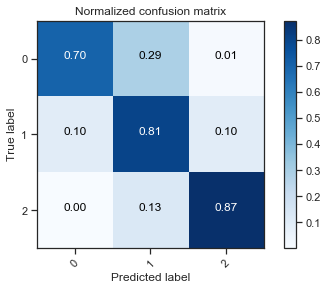

In [207]:
logistic_reg()

# Random Forest Classifier

In [197]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

clf = RandomForestClassifier(max_depth=200, random_state=0)
clf.fit(X_train, y_train)

preds = clf.predict(X_test)

clf_matrix = confusion_matrix(y_test, preds)
np.set_printoptions(precision=2)




In [208]:
# Plot non-normalized confusion matrix
def randomforrest():


    # Plot normalized confusion matrix
    plt.figure()
    plot_confusion_matrix(clf_matrix, normalize=True,  classes=[0,1,2],
                          title='Normalized confusion matrix')



Normalized confusion matrix
[[7.20e-01 2.75e-01 4.78e-03]
 [1.19e-01 7.78e-01 1.03e-01]
 [8.21e-04 1.67e-01 8.33e-01]]


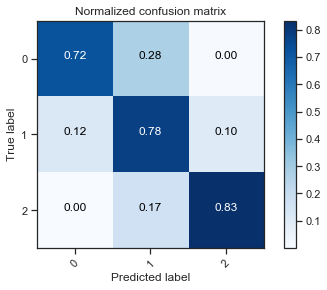

In [209]:
randomforrest()